# **Machine Learning Essentials // Summer Semester 2024 // Exercise 01**

## **Team Members**


1.   Sushmitha Chandrakumar - 4732591
2.   
3.






# **1 Exploring the Data**

In [1]:
import numpy
import sklearn
import matplotlib

In [2]:
from sklearn . datasets import load_digits
digits = load_digits()
print(digits.keys())
data = digits["data"]
images = digits["images"]
target = digits["target"]


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


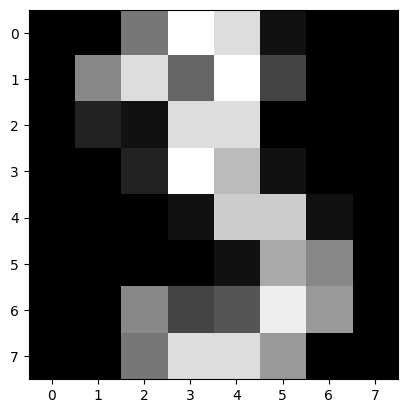

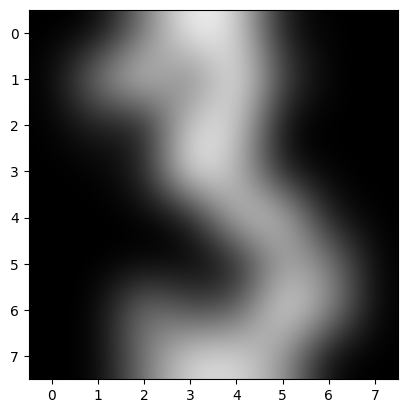

In [3]:
import numpy as np
import matplotlib . pyplot as plt
img = digits.images[3]
assert 2 == len( img . shape )
plt.figure ()
plt.gray ()
plt.imshow (img , interpolation ="nearest")
plt.show ()
plt.imshow (img , interpolation ="bicubic") # also try interpolation =" bicubic "
plt.show ()

In [4]:
from sklearn import model_selection
X_all = data
y_all = target
filtered_indices = (target == 3) | (target == 9)
data_filtered = data[filtered_indices]
target_filtered = target[filtered_indices]
target_filtered = np.where(target_filtered == 3, -1, 1)
X_train , X_test , y_train , y_test = model_selection.train_test_split ( digits.data , digits.target ,test_size = 0.4 , random_state = 0)


# **2 Hand-crafted classifer**
##**2.1 Feature construction**

In [9]:
def features2d(x):
    # Using sum of rows and sum of columns as features
    sum_rows = np.sum(x.reshape(-1, 8, 8), axis=1)
    sum_cols = np.sum(x.reshape(-1, 8, 8), axis=2)
    return np.column_stack((sum_rows, sum_cols))
X_train_features = features2d(X_train)  # Ensure this processes to (N, 2) shape
X_test_features = features2d(X_test)    # Ensure this processes to (N, 2) shape

print(X_train_features.shape)  # Should output (N, 2)
print(X_test_features.shape)   # Should output (N, 2)


(1078, 16)
(719, 16)


## **2.2 Scatterplot**

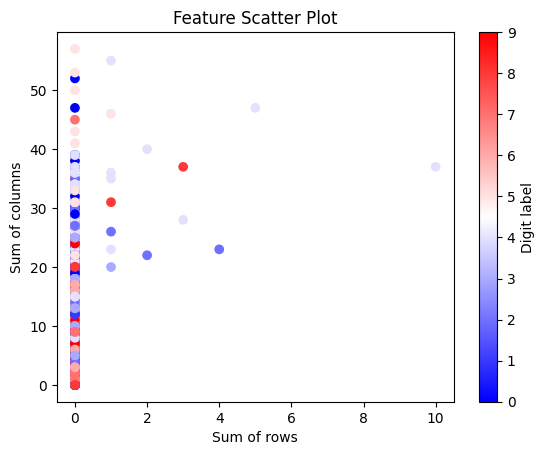

In [6]:
# Scatterplot the data
X_train_features = features2d(X_train)
X_test_features = features2d(X_test)
plt.scatter(X_train_features[:, 0], X_train_features[:, 1], c=y_train, cmap='bwr', marker='o')
plt.xlabel('Sum of rows')
plt.ylabel('Sum of columns')
plt.title('Feature Scatter Plot')
plt.colorbar(label='Digit label')
plt.show()

##**2.3 Decision rule**

In [12]:
import numpy as np

def nearest_mean(training_features, training_labels, test_features):
    unique_labels = np.unique(training_labels)
    means = {label: np.mean(training_features[training_labels == label], axis=0) for label in unique_labels}
    predicted_labels = []
    for feature in test_features:
        nearest_label = min(means, key=lambda label: np.linalg.norm(feature - means[label]))
        predicted_labels.append(nearest_label)
    return np.array(predicted_labels)


# Calculate the predicted labels for training and test sets
y_train_pred = nearest_mean(X_train_features, y_train, X_train_features)
y_test_pred = nearest_mean(X_train_features, y_train, X_test_features)

# Function to calculate classification error
def classification_error(y_true, y_pred):
    return np.mean(y_true != y_pred)

# Print the errors
print("Training Error:", classification_error(y_train, y_train_pred))
print("Test Error:", classification_error(y_test, y_test_pred))


Training Error: 0.17439703153988867
Test Error: 0.20027816411682892


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=200):
    # Define ranges to plot the figure
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Set up meshgrid
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, resolution),
                           np.linspace(x2_min, x2_max, resolution))

    # Predict class labels for all grid points
    Z = classifier(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Plot the decision regions
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, label=f'Class {cl}')

# Assuming X_train_features and y_train have been defined in your notebook:
# Reuse nearest_mean from your existing code as the classifier function
def classifier(grid_points):
    return nearest_mean(X_train_features, y_train, grid_points)

# Generate a plot of the decision regions
plot_decision_regions(X_test_features, y_test, classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()


ValueError: operands could not be broadcast together with shapes (2,) (16,) 